## Radiology 229 - Class 5 Exercises (Lectures 4A-C)

After watching lectures 4A-C, it is recommended that you look at the Extended Phase Graphs (EPG) tutorial in Python for reference.  

Objectives:
1) Understand the EPG basis, and transformation to/from M distribution
2) Explore sequence operations in the EPG basis

First we import basic libraries including  <code>mrsigpy</code>.


In [8]:
# -- We use the functions in mrsigpy, as well as standard numpy and matpltlib
import numpy as np
import mrsigpy as mrs
import matplotlib.pyplot as plt
#from PIL import Image


Definitions:  The transverse magnetization is expressed as $m_{xy} = m_x + i*m_y$, and longitudinal magnetization is $m_z$.  Then we write a real-valued vector $M = [m_{xy}\;\; m^\ast_{xy}\;\; m_z]^T$.

For example, after a $90^\circ_y$ pulse, which tips magnetization into the transverse plane, $M = [1\;\;1\;\;0]^T$.  Following a unit gradient $M=[e^{2\pi i z}\;\; e^{-2\pi i z}\;\;0]$.  $z$ is the voxel dimension.  You can assume the voxel goes from $z=0$ to $z=1$.  Note:  sometimes the graphics are from $z=-0.5$ to $z=0.5$, but the mathematical definition is unchanged.

In the EPG basis, after the $90^\circ_y$, the only nonzero state is $F_0=1$.  After the gradient, the only non-zero state is $F_1=1$.  It is easily seen that these F states lead to the $M$ definition above.  

The $M \rightarrow (F,Z)$ transfortion is not as obvious, but relatively clear knowing that integrals over an integer number of cycles are 0.  Recall the $F_n$ definition as $F^+_n = \int_0^1 M_{xy}(z) e^{-2\pi inz}dz$.

Below you can see these graphically, using the Python EPG tools.



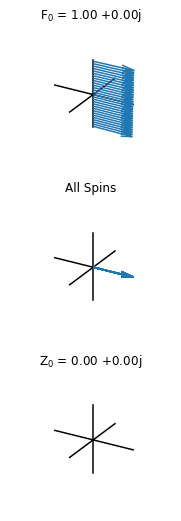

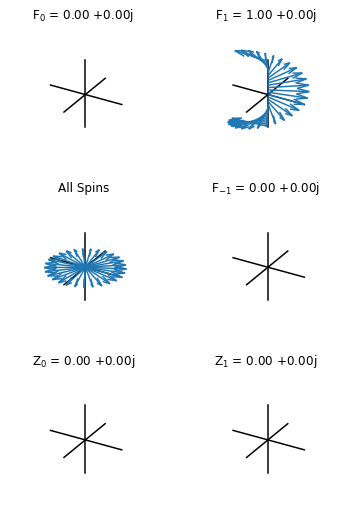

In [9]:
# -- STart after a 90y RF pulse from equilibrium:
FZ = np.array([[1],[1],[0]])  # Following RF tip.
mrs.epg_show(FZ,29)           # Plot, using 29 values for voxel dimension z

# -- After the gradient is applied:
FZ = np.array([[0,1],[0,0],[0,0]])
mrs.epg_show(FZ,29)           # Plot, using 29 values for voxel dimension z


You should convince yourself at this point that the displayed magnetization matches the expressions as a function of voxel volume $z$.  In particular, after the unit gradient $M=[e^{2\pi i z}\;\; e^{-2\pi i z}\;\;0]$.  (Note that the $F_1$ state is plotted for $z=-0.5$ to $z=0.5$.)

We can test the forward $M \rightarrow (F,Z)$ transformation in python numerically, for the magnetization after the gradient as follows.

Shape of Mref is  (3, 29)


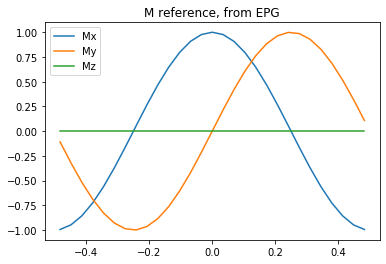

FZ test is  [[ 7.65671051e-18+0.j  1.00000000e+00+0.j]
 [ 7.65671051e-18+0.j -6.12536841e-17+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j]]


In [10]:
# -- Show the forward transformation from M to FZ after 90y and gradient.
#
# -- Define #spins
nspins=29
z = mrs.epg_spinlocs(nspins)        # voxel locations, for plotting.        
# First do the "inverse" transformation FZ=>M for reference
FZ = np.array([[0,1],[0,0],[0,0]])
Mref = mrs.epg_FZ2spins(FZ,nspins)
print("Shape of Mref is ", np.shape(Mref))


plt.plot(z,Mref[0,:],z,Mref[1,:],z,Mref[2,:])
plt.legend(("Mx","My","Mz"))
plt.title("M reference, from EPG")
plt.show()

FZtest = mrs.epg_spins2FZ(Mref)
print("FZ test is ",FZtest)




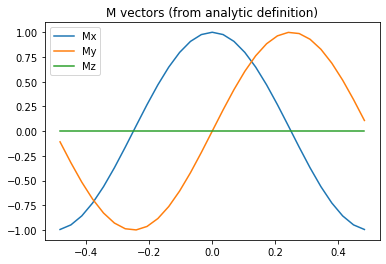

EPG State matrix: [[ 7.65671051e-18+0.j  1.00000000e+00+0.j]
 [ 7.65671051e-18+0.j -6.12536841e-17+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j]]


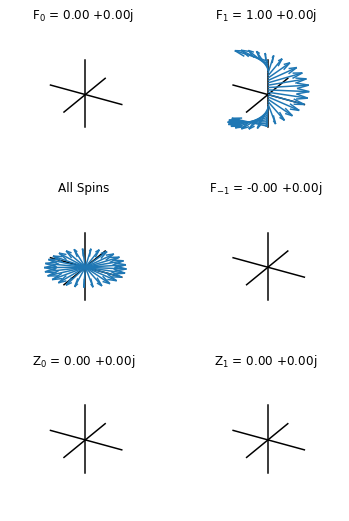

In [11]:
# Now start with M and do the forward Transform M=>FZ
# 

# -- Define the magnetization
mx = np.cos(2*np.pi*z)              # Mx is the real part of Mxy
my = np.sin(2*np.pi*z)              # Mx is the real part of Mxy
mz = 0*mx                           # Mz is all zero here.
plt.plot(z,mx,z,my,z,mz)            # Plot the magnetization components to check
plt.legend(("Mx","My","Mz"))
plt.title("M vectors (from analytic definition)")
plt.show()

# -- Assemble the M matrix (mx,my,mz)
M = np.concatenate((np.expand_dims(mx,axis=0),
                    np.expand_dims(my,axis=0),
                    np.expand_dims(mz,axis=0)),axis=0)  # Assemble into matrix.

# -- Convert to EPG
FZ = mrs.epg_spins2FZ(M)        # Forward M=>FZ transform.
print("EPG State matrix:", FZ)
mrs.epg_show(FZ,29)           # Show States (again) to confirm!

# Exercise 1:  EPG states

Write the EPG state amplitudes ($Q$ matrix) for the following configurations:

a) $m_x = 1$ across voxel, $m_y=m_z=0$

b) $m_y = 1$ across voxel, $m_x=m_z=0$

c) $m_x = \cos(2\pi z)$, $m_y=m_z=0$

d) $m_y = \cos(2\pi z)$, $m_x=m_z=0$

e) $m_x = \sin(2\pi z)$, $m_y=m_z=0$

f) $m_y = \sin(2\pi z)$ and $m_z = 0.5\sin(2\pi z)$



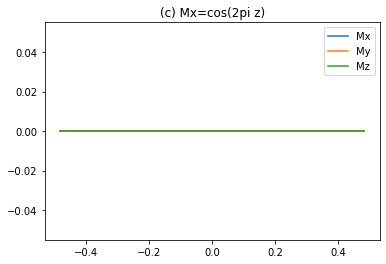

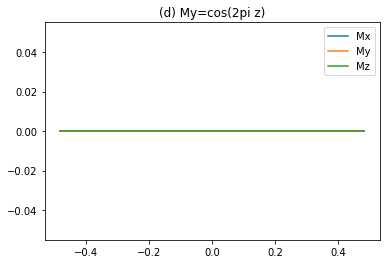

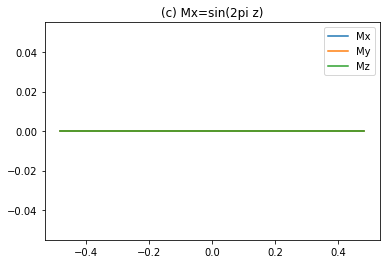

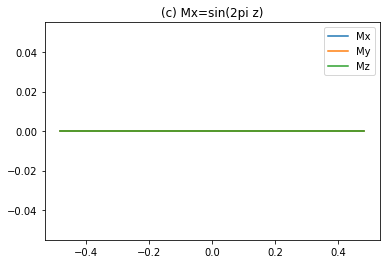

In [37]:
# -- Exercise 1
#
# Display code is provided... just fill in the FZ lines
#
# a) 
FZ = np.array([[0],[0],[0]])
#mrs.epg_show(FZ,29)

# b) 
#FZ = np.array([[],[],[]])
#mrs.epg_show(FZ,29)

# c)
#FZ = np.array([[],[],[]])
M = mrs.epg_FZ2spins(FZ,nspins)
plt.plot(z,M[0,:],z,M[1,:],z,M[2,:])
plt.legend(("Mx","My","Mz"))
plt.title("(c) Mx=cos(2pi z)")
plt.show()

# d)
#FZ = np.array([[],[],[]])
M = mrs.epg_FZ2spins(FZ,nspins)
plt.plot(z,M[0,:],z,M[1,:],z,M[2,:])
plt.legend(("Mx","My","Mz"))
plt.title("(d) My=cos(2pi z)")
plt.show()

# e) 
#FZ = np.array([[],[],[]])
M = mrs.epg_FZ2spins(FZ,nspins)
plt.plot(z,M[0,:],z,M[1,:],z,M[2,:])
plt.legend(("Mx","My","Mz"))
plt.title("(c) Mx=sin(2pi z)")
plt.show()

# f) 
#FZ = np.array([[],[],[]])
M = mrs.epg_FZ2spins(FZ,nspins)
plt.plot(z,M[0,:],z,M[1,:],z,M[2,:])
plt.legend(("Mx","My","Mz"))
plt.title("(c) Mx=sin(2pi z)")
plt.show()

# Sequence Operations

Now we do the stimulated example in the lecture:

[[0.5000000000000001, (-0.4999999999999999+6.123233995736765e-17j), (1-6.123233995736766e-17j)], [(-0.4999999999999999-6.123233995736765e-17j), 0.5000000000000001, (1+6.123233995736766e-17j)], [(-0.5-3.061616997868383e-17j), (-0.5+3.061616997868383e-17j), 6.123233995736766e-17]]
[[0.5000000000000001, (-0.4999999999999999+6.123233995736765e-17j), (1-6.123233995736766e-17j)], [(-0.4999999999999999-6.123233995736765e-17j), 0.5000000000000001, (1+6.123233995736766e-17j)], [(-0.5-3.061616997868383e-17j), (-0.5+3.061616997868383e-17j), 6.123233995736766e-17]]


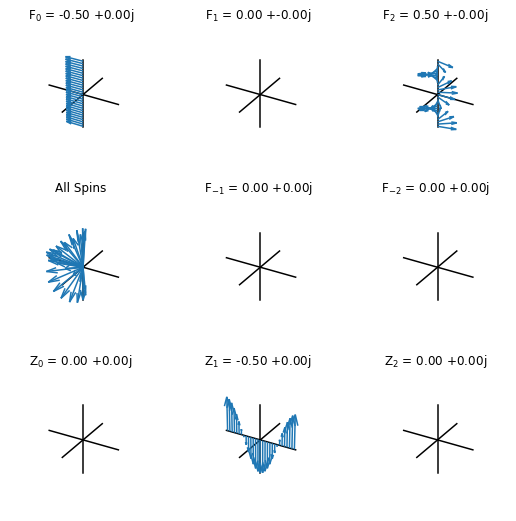

In [13]:
# -- Basic 90-grad-90-grad sequence
# -- Code is the same as class slide (Matlab)
# 
FZ = mrs.epg_m0()
FZ = mrs.epg_rf(FZ)        # Defaults to π/2y
FZ = mrs.epg_grad(FZ)      
FZ = mrs.epg_rf(FZ)      
FZ = mrs.epg_grad(FZ)
mrs.epg_show(FZ,Nspins=29)

# Exercise 2:  60-degree Stimulated Echo Example
Use the above example to write EPG code to show the state evolution in the notes, and convince yourself of the slide animations.



In [14]:
# -- Exercise:  60-degree 3-Echo Stimulated Echo example
#
# Get above code and modify as follows:
#   Insert more mrs.epg_show() functions to show intermediate stages
#   change the flip angles to 60


